In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
dataset = pd.read_csv("UberDataset.csv")
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
dataset.shape

(1156, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [12]:
dataset['PURPOSE'].fillna('NOT',inplace= True)

In [13]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
dataset["START_DATE"] = pd.to_datetime(dataset["START_DATE"],errors='coerce')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [17]:
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [28]:
from datetime import datetime
dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE']).date 
dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE']).date 


In [34]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DAY_NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [30]:
dataset["DAY_NIGHT"] = pd.cut(x = dataset['Time'],bins=[0,10,15,19,24],labels=["Morning","Afternoon","Evening","Night"])

In [32]:
dataset.dropna(inplace=True)

In [37]:
dataset.shape

(413, 10)

# Data Visualization

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

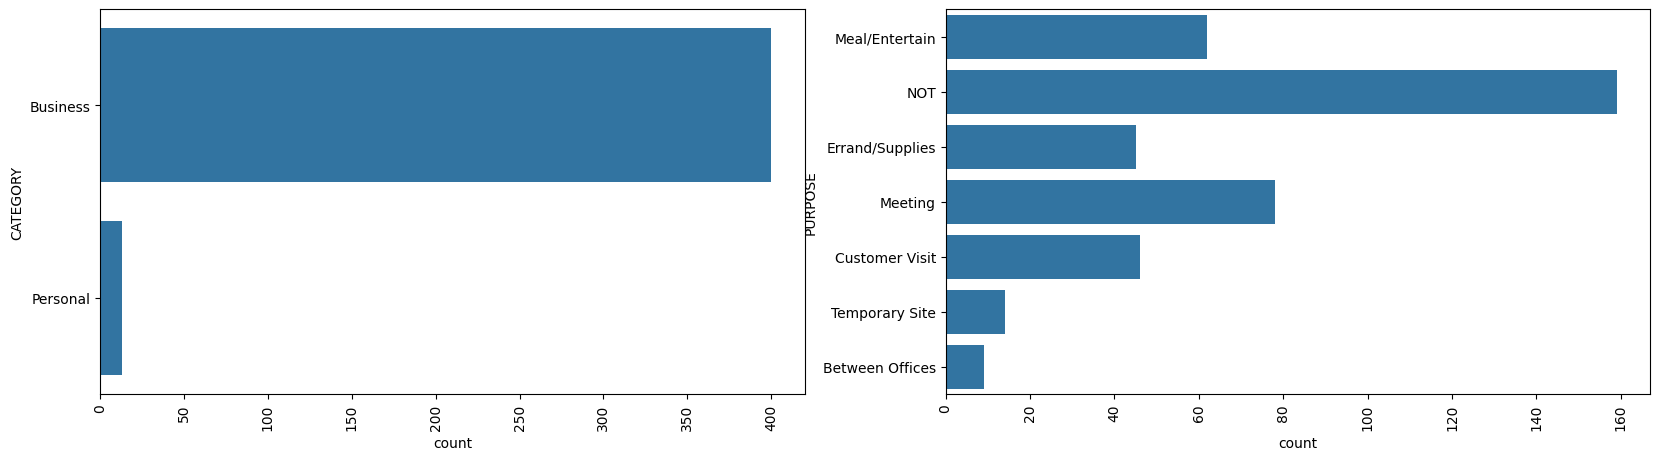

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(dataset["CATEGORY"])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

<Axes: xlabel='count', ylabel='DAY_NIGHT'>

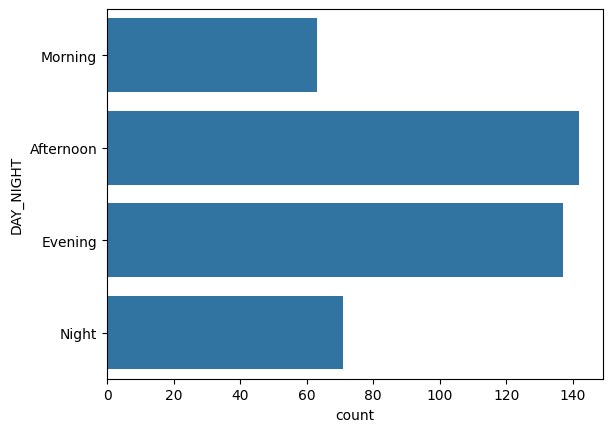

In [51]:
sns.countplot(dataset['DAY_NIGHT'])

In [67]:
dataset['MONTH'] = pd.to_datetime(dataset['Date']).dt.month_name()

In [68]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DAY_NIGHT,Month,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,January,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January,January


<Axes: xlabel='count', ylabel='Month'>

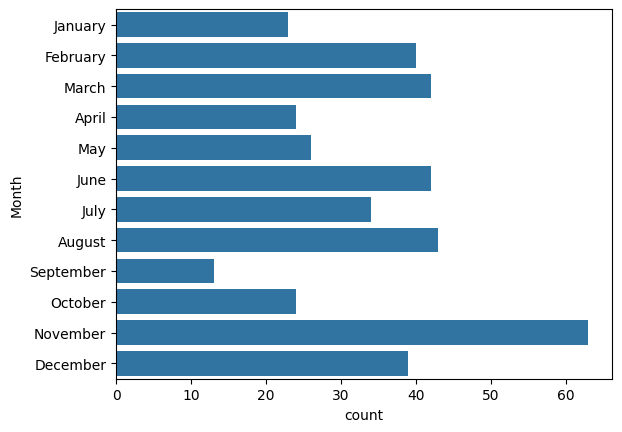

In [69]:
sns.countplot(dataset['Month'])

[Text(0.5, 0, 'MONTH'), Text(0, 0.5, 'VALUE_COUNT')]

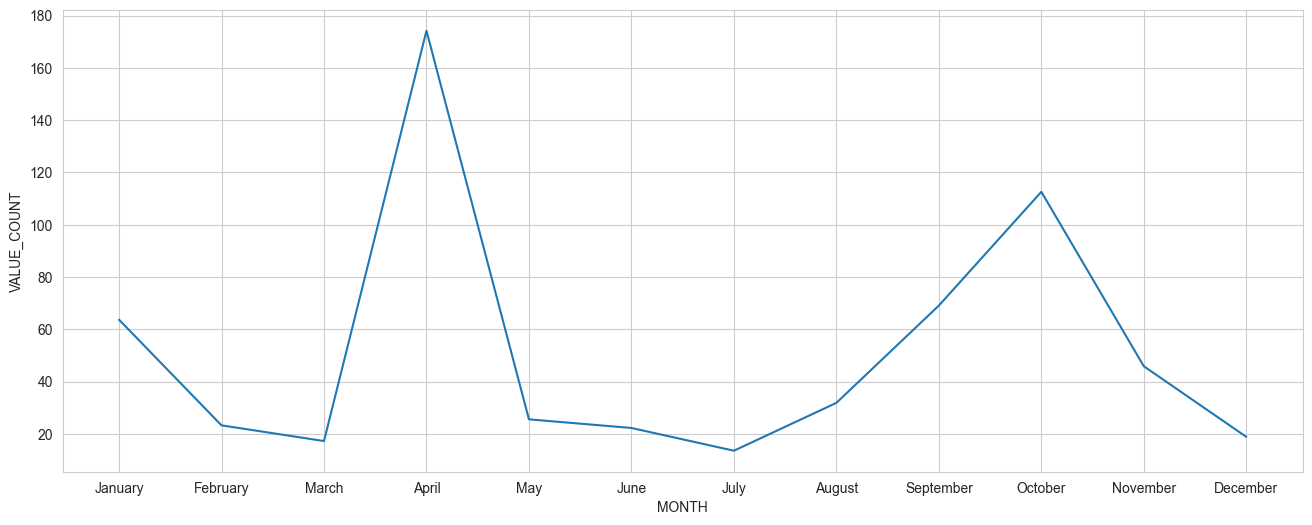

In [96]:
mon = dataset['MONTH'].value_counts(sort=False)

max_miles = dataset.groupby("MONTH", sort=False)["MILES"].max()

df = pd.DataFrame({
    "MONTHS": mon.index,
    "VALUE_COUNT": max_miles.values
})
plt.figure(figsize = (16,6))
p = sns.lineplot(data=df, x="MONTHS", y="VALUE_COUNT")
p.set(xlabel="MONTH", ylabel="VALUE_COUNT")


In [72]:
dataset["DAY"] = dataset.START_DATE.dt.weekday
day_label = {
    0:'Mon',
    1: "Tues",
    2:'Wed',
    3:"Thu", 
    4:"Fri",
    5:"Sat", 
    6:"Sun"
}
dataset['DAY']  = dataset['DAY'].map(day_label)

In [73]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DAY_NIGHT,Month,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January,January,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,January,January,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January,January,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January,January,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January,January,Wed


Text(0, 0.5, 'COUNT')

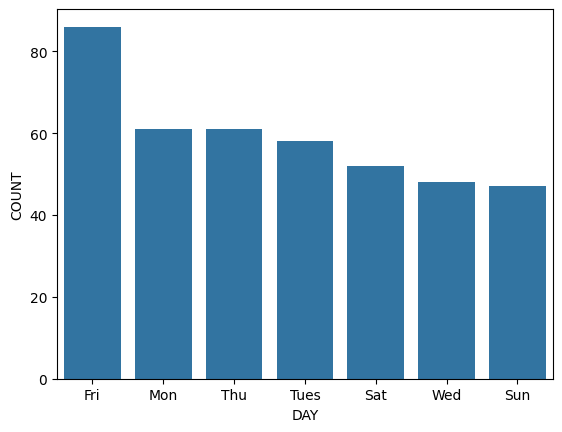

In [76]:
day_label = dataset.DAY.value_counts()
sns.barplot(x = day_label.index,y = day_label)
plt.xlabel("DAY")
plt.ylabel("COUNT")

<Axes: ylabel='MILES'>

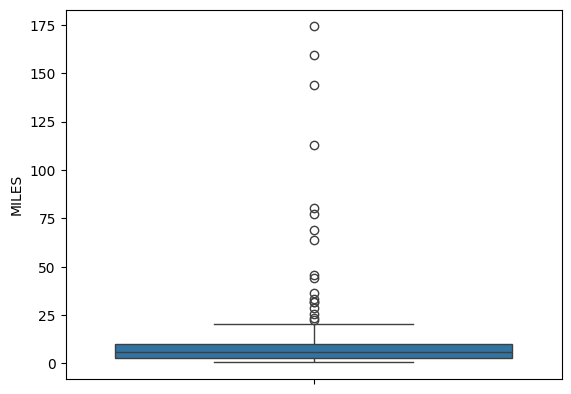

In [77]:
sns.boxplot(dataset["MILES"])

<Axes: ylabel='MILES'>

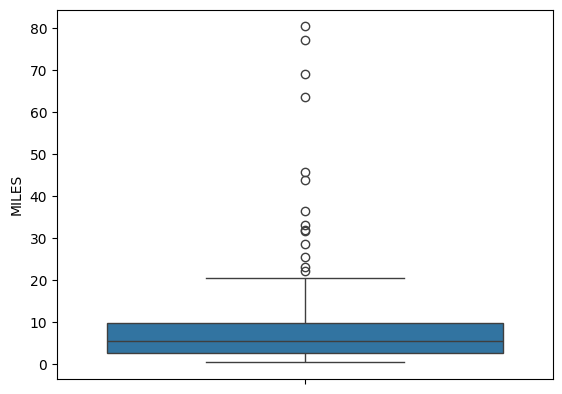

In [79]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<Axes: ylabel='MILES'>

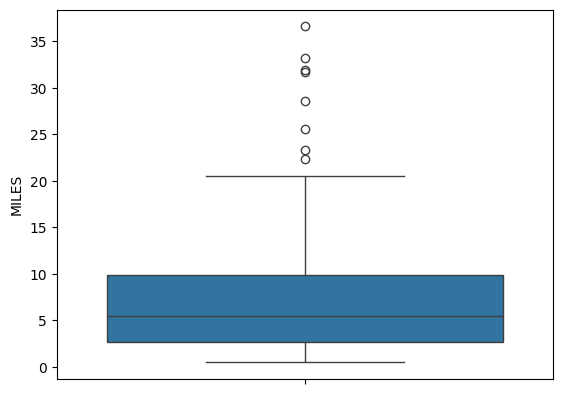

In [82]:
sns.boxplot(dataset[dataset["MILES"]<40]["MILES"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16108\3239613594.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset["MILES"]<40]["MILES"])


<Axes: xlabel='MILES', ylabel='Density'>

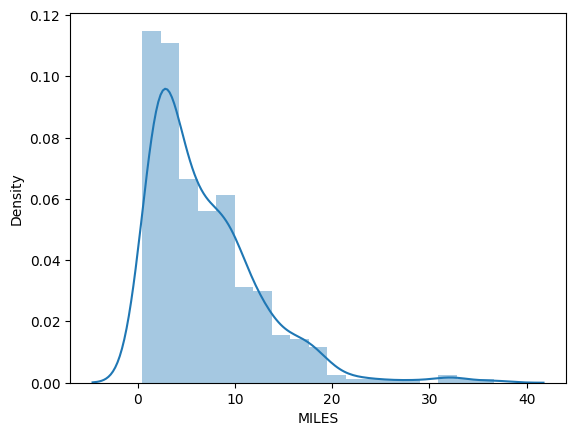

In [86]:
sns.distplot(dataset[dataset["MILES"]<40]["MILES"])

<Axes: xlabel='MILES', ylabel='Count'>

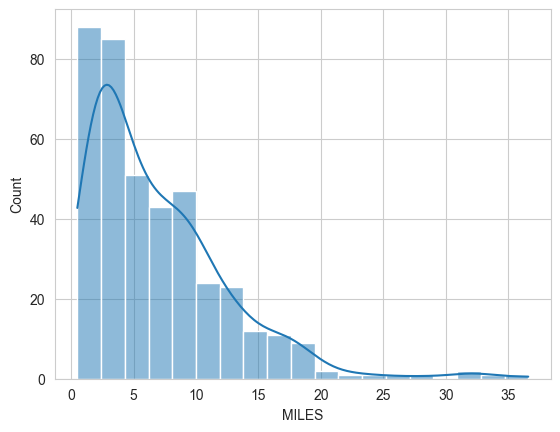

In [93]:
sns.set_style("whitegrid")
filtered = dataset[dataset["MILES"] < 40]["MILES"]
sns.histplot(filtered, kde=True)
